In [ ]:
import zipfile
import os
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
 -O /tmp/rockpaperscissors.zip

--2021-07-18 03:10:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.40MB/s    in 2m 22s  

2021-07-18 03:13:02 (2.16 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
data_zip='/tmp/rockpaperscissors.zip'
zip_ref=zipfile.ZipFile(data_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
dir_data = "/tmp/rockpaperscissors/rps-cv-images"
dir_paper = os.path.join("/tmp/rockpaperscissors/rps-cv-images/paper")
dir_rock = os.path.join("/tmp/rockpaperscissors/rps-cv-images/rock")
dir_scissors = os.path.join("/tmp/rockpaperscissors/rps-cv-images/scissors")

In [ ]:
total_data_paper = len(os.listdir(dir_paper))
total_data_rock = len(os.listdir(dir_rock))
total_data_scissors = len(os.listdir(dir_scissors))
print("Jumlah Data Paper     : ",total_data_paper)
print("Jumlah Data Rock      : ",total_data_rock)
print("Jumlah Data Scissors  : ",total_data_scissors)

Jumlah Data Paper     :  712
Jumlah Data Rock      :  726
Jumlah Data Scissors  :  750


In [ ]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images',output='/tmp/rockpaperscissors/output_split',ratio=(0.8,0.2))

Copying files: 2188 files [00:00, 2281.59 files/s]


In [ ]:
main_dir='/tmp/rockpaperscissors/output_split'
train_dir=os.path.join(main_dir,'train')
val_dir=os.path.join(main_dir,'val')

os.listdir('/tmp/rockpaperscissors/output_split/train')
os.listdir('/tmp/rockpaperscissors/output_split/val')

['paper', 'scissors', 'rock']

In [ ]:
train_paper_dir=os.path.join(train_dir,'paper')
train_rock_dir=os.path.join(train_dir,'rock')
train_scissors_dir=os.path.join(train_dir, 'scissors')

validation_paper_dir=os.path.join(val_dir,'paper')
validation_rock_dir=os.path.join(val_dir,'rock')
validation_scissors_dir=os.path.join(val_dir,'scissors')

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
     )
test_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
    )

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
)
validation_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
Model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])

Adam(learning_rate=0.00146,name='Adam')
Model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >0.92 and logs.get('val_accuracy') >0.92):  
      print('\n Akurasi pada Training Set dan Validation Set sudah mencapai 92%')
      self.model.stop_training = True

custom_callback = stopTraining()

In [ ]:
History=Model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=custom_callback
)

Epoch 1/20
25/25 - 12s - loss: 0.4768 - accuracy: 0.8200 - val_loss: 0.4019 - val_accuracy: 0.8500
Epoch 2/20
25/25 - 12s - loss: 0.2405 - accuracy: 0.9200 - val_loss: 0.4465 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 12s - loss: 0.5160 - accuracy: 0.8200 - val_loss: 0.2929 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 12s - loss: 0.2389 - accuracy: 0.9200 - val_loss: 0.1828 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 12s - loss: 0.2749 - accuracy: 0.9100 - val_loss: 0.3262 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 12s - loss: 0.2904 - accuracy: 0.8600 - val_loss: 0.4831 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 12s - loss: 0.2245 - accuracy: 0.9100 - val_loss: 0.3664 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 12s - loss: 0.2434 - accuracy: 0.9400 - val_loss: 0.5437 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 12s - loss: 0.3405 - accuracy: 0.8800 - val_loss: 0.3386 - val_accuracy: 0.9000
Epoch 10/20
25/25 - 12s - loss: 0.2084 - accuracy: 0.9300 - val_loss: 0.4254 - val_accuracy: 0.8000
Epoch 11/

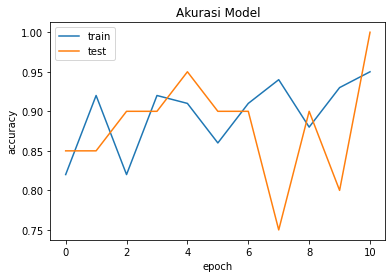

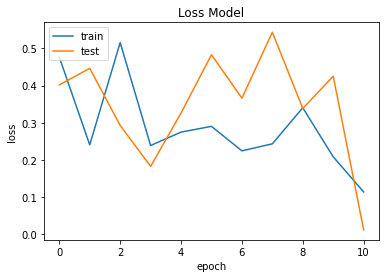

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving pukul.jpg to pukul.jpg
pukul.jpg
PAPER


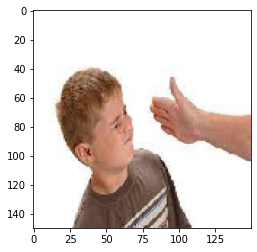

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
  path=fn
  img=image.load_img(path,target_size=(150,150))
  imgplot=plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes =Model.predict(images, batch_size=10)

  print(fn)
  a=classes[0,0]
  b=classes[0,1]
  c=classes[0,2]
 
if a  ==  1:
   print('PAPER')
elif b  ==  1:
     print('ROCK')
elif c  ==  1:
     print('SCISSORS')